In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train[0].shape)

(28, 28)


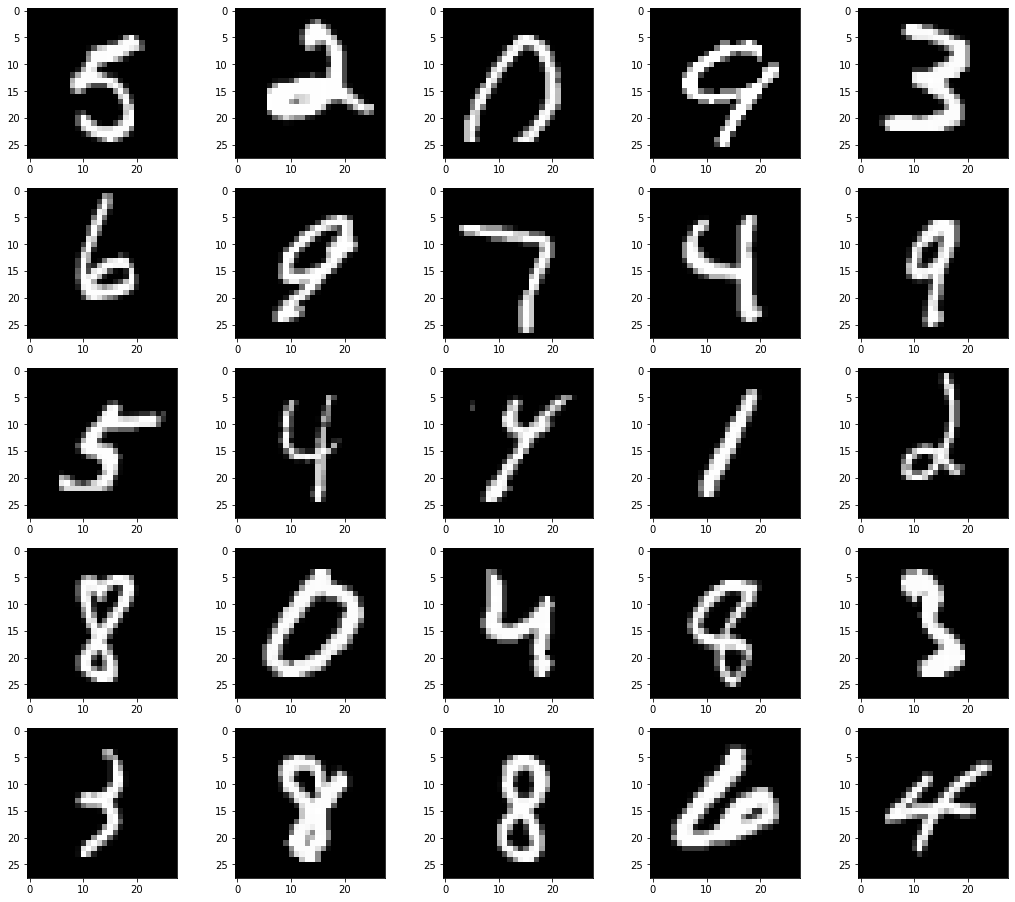

In [4]:
nums = []
for i in np.arange(0,25):
    nums.append(f"ax{i}")
fig, ((nums[0:5]),(nums[5:10]), (nums[10:15]), (nums[15:20]), (nums[20:25])) = plt.subplots(5, 5,figsize=(18,16))
for i in nums:
    i.imshow(X_train[np.random.randint(0,len(X_train))], cmap = 'gray')
plt.show()

In [5]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#X_train = X_train.astype('float64')
#X_test = X_test.astype('float64')

# Hot Encoding the Label Data
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
y_train = lb.fit_transform(y_train)
y_classes = lb.classes_

In [6]:
# building a linear stack of layers with the sequential model
model = Sequential()

# Convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(50, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
         ModelCheckpoint(filepath='best_model_MNIST.h5', monitor='val_loss', save_best_only=True)]


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                845050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 845,810
Trainable params: 845,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
# training the model for 10 epochs
history = model.fit(X_train, y_train, batch_size=128, callbacks=callbacks, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 35s 72ms/step - loss: 7.5290 - accuracy: 0.4735 - val_loss: 0.7136 - val_accuracy: 0.8435
Epoch 2/200
469/469 [==============================] - 32s 68ms/step - loss: 0.5921 - accuracy: 0.8735 - val_loss: 0.4356 - val_accuracy: 0.9269
Epoch 3/200
469/469 [==============================] - 32s 68ms/step - loss: 0.3732 - accuracy: 0.9279 - val_loss: 0.3355 - val_accuracy: 0.9389
Epoch 4/200
469/469 [==============================] - 32s 68ms/step - loss: 0.2718 - accuracy: 0.9472 - val_loss: 0.2682 - val_accuracy: 0.9517
Epoch 5/200
469/469 [==============================] - 32s 68ms/step - loss: 0.1910 - accuracy: 0.9632 - val_loss: 0.2334 - val_accuracy: 0.9546
Epoch 6/200
469/469 [==============================] - 31s 66ms/step - loss: 0.1509 - accuracy: 0.9693 - val_loss: 0.1926 - val_accuracy: 0.9629
Epoch 7/200
469/469 [==============================] - 31s 67ms/step - loss: 0.1150 - accuracy: 0.9769 - val_loss: 0.1745 - val_ac

In [9]:
y_pred = model.predict(X_test).round()

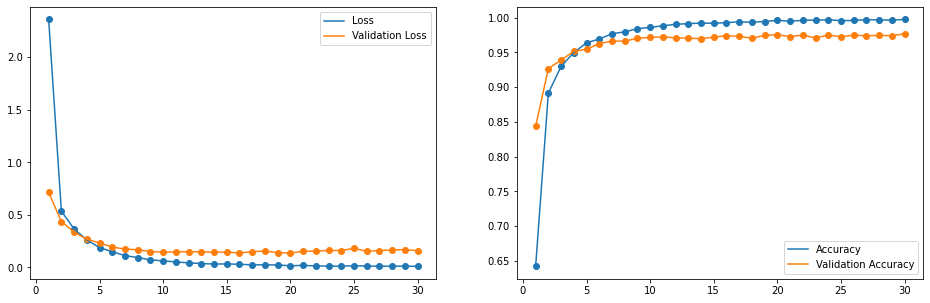

In [10]:
epochs = len(history.history['loss'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.plot(np.arange(1,epochs+ 1),history.history['loss'], label = 'Loss') 
ax1.plot(np.arange(1,epochs+ 1),history.history['val_loss'], label = 'Validation Loss')
ax1.scatter(np.arange(1,epochs+ 1),history.history['loss']) 
ax1.scatter(np.arange(1,epochs+ 1),history.history['val_loss'])

ax2.plot(np.arange(1,epochs+ 1),history.history['accuracy'], label = 'Accuracy') 
ax2.plot(np.arange(1,epochs+ 1),history.history['val_accuracy'], label = 'Validation Accuracy')

ax2.scatter(np.arange(1,epochs+ 1),history.history['accuracy']) 
ax2.scatter(np.arange(1,epochs+ 1),history.history['val_accuracy'])

ax1.legend()
ax2.legend()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [12]:
matrix

array([[ 969,    1,    2,    1,    0,    1,    3,    0,    2,    1],
       [   1, 1122,    4,    2,    0,    1,    2,    0,    3,    0],
       [   5,    2, 1003,    1,    0,    0,    2,    9,    9,    1],
       [   4,    0,    0,  996,    0,    3,    0,    4,    2,    1],
       [   1,    1,    2,    0,  962,    0,    3,    1,    1,   11],
       [   5,    0,    1,   10,    0,  868,    7,    0,    1,    0],
       [   9,    1,    0,    1,    2,    4,  939,    0,    2,    0],
       [   0,    5,    9,    5,    1,    0,    0,  992,    3,   13],
       [   8,    1,    5,    3,    4,    4,    3,    5,  936,    5],
       [   2,    4,    0,    3,   10,    5,    0,    4,    4,  977]],
      dtype=int64)

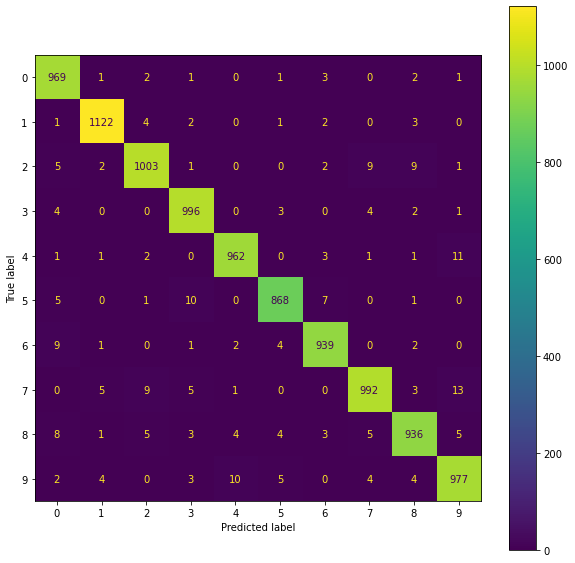

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
fig = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=y_classes)
fig.plot(ax=ax)
plt.show()

In [14]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred,average='macro')*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')*100:.2f}%")

Accuracy: 97.64%
Precision: 97.74%
Recall: 97.63%
